# Using OSMX to get street data for Middleton, Wisconsin

In [2]:
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import pandas as pd
import itertools

False


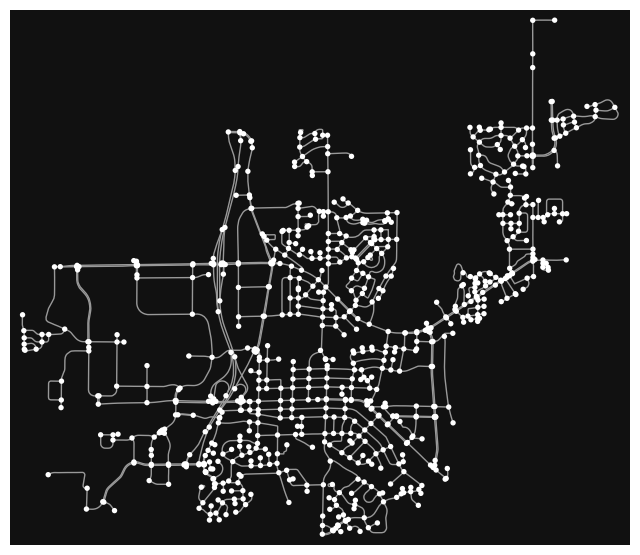

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
G = ox.graph_from_place('Middleton, Wisconsin', network_type='drive')
G = ox.utils_graph.get_undirected(G)

nx.set_edge_attributes(G, True, name='original')

ox.plot_graph(G)

In [6]:
print(G)

MultiGraph with 813 nodes and 1151 edges


### Part 1: Reading Data and Creating Graph

Take a step back and visualize the data in our graph

In [7]:
print('# of edges: {}'.format(G.number_of_edges()))
print('# of nodes: {}'.format(G.number_of_nodes()))

print(G.edges(data=True))
print(G.nodes(data=True))


# of edges: 1151
# of nodes: 813
[(30052861, 454667326, {'osmid': 871134221, 'oneway': True, 'lanes': '2', 'ref': 'CTH MS', 'name': 'University Avenue', 'highway': 'primary', 'maxspeed': '35 mph', 'reversed': False, 'length': 10.805, 'from': 30052861, 'to': 454667326, 'geometry': <LINESTRING (-89.486 43.09, -89.486 43.09)>, 'original': True}), (30052861, 2573782092, {'osmid': [700703012, 871134222], 'oneway': True, 'name': 'Allen Boulevard', 'highway': 'secondary', 'reversed': False, 'length': 32.204, 'lanes': '2', 'geometry': <LINESTRING (-89.486 43.09, -89.486 43.09, -89.486 43.09)>, 'from': 30052861, 'to': 2573782092, 'original': True}), (30052861, 6580230376, {'osmid': 478738601, 'oneway': True, 'lanes': '3', 'ref': 'CTH MS', 'name': 'University Avenue', 'highway': 'primary', 'maxspeed': '35 mph', 'reversed': False, 'length': 42.193, 'from': 6580230376, 'to': 30052861, 'geometry': <LINESTRING (-89.486 43.09, -89.486 43.09)>, 'original': True}), (30053475, 3426163949, {'osmid': 1787

##### Visualize the Graph

In [8]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['x'], node[1]['y']) for node in G.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])


{30052861: (-89.4860915, 43.0898193),
 30053475: (-89.4902579, 43.1041156),
 38408843: (-89.5140532, 43.0967641),
 38408844: (-89.5177331, 43.0968493),
 38409074: (-89.5235603, 43.0967551)}

Now plot

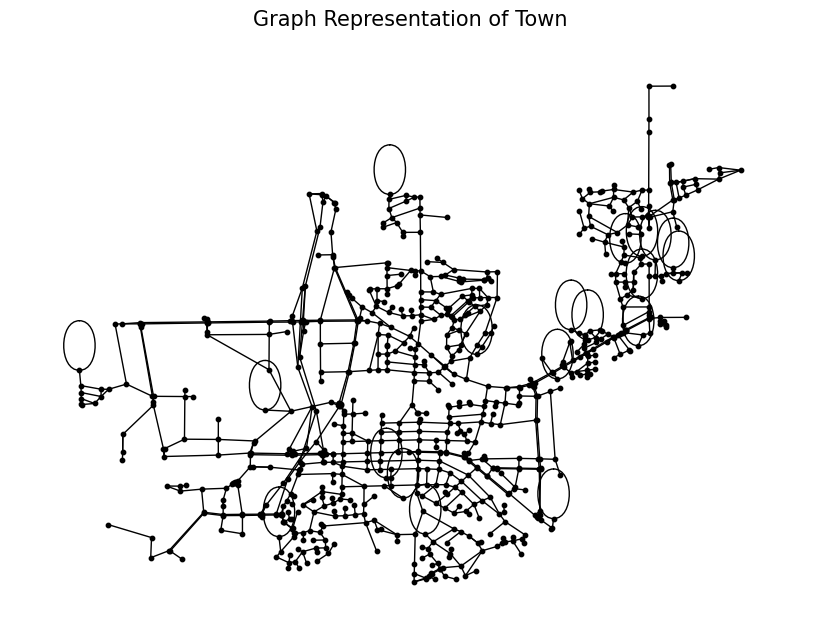

In [9]:
plt.figure(figsize=(8, 6))
nx.draw(G, pos=node_positions, node_size=10, node_color='blue')
plt.title('Graph Representation of Town', size=15)
plt.show()

### Part 2: Cleaning Data

There a number of issues with this graph. First, it's not strongly connected

How to implement Chinese Postman Problem for directed graphs?

### Part 2: Solving the Chinese Postman Problem

#### Step 1: Determine number of vertices with odd degree

In [10]:
odd_degree_nodes = [v for v,d in G.degree() if d%2 == 1]
print("number of nodes of odd degree:" , len(odd_degree_nodes))
print(odd_degree_nodes)

number of nodes of odd degree: 604
[30052861, 30053475, 38408844, 53281781, 53289001, 53289002, 53296360, 53303116, 53331864, 53338041, 53363946, 53378999, 53379026, 53385448, 53385468, 53399541, 53401509, 53407531, 53407537, 53413212, 53413326, 53413348, 53413369, 53413372, 53413374, 53413924, 53416490, 53416506, 53416524, 53417501, 53423900, 53423905, 53424384, 53424398, 53424486, 53424499, 53426981, 53430934, 53433837, 53437014, 53445019, 53445021, 53447340, 53447346, 53448011, 53448012, 53451482, 53453766, 53453769, 53453772, 53453792, 53453795, 53453801, 53453805, 53453808, 53453833, 53456825, 53456843, 53460132, 53461191, 53461211, 53461235, 53461535, 53463110, 53464525, 53464534, 53466106, 53466118, 53466122, 53466131, 53467583, 53467594, 53467671, 53467672, 53468335, 53469279, 53469302, 53469730, 53470505, 53470509, 53470517, 53470551, 53472455, 53475938, 53475967, 53476230, 53478724, 53478733, 53478861, 53478865, 53478868, 53480711, 53480723, 53480734, 53480737, 53480759, 5348

#### Step 2: Find the minimum distance pairs between odd degree vertices.

This is the hardest part of the problem, broken down into five stages:

1. Compute all possible pairs of odd degree nodes.
2. Compute the shortest path between each node pair calculated in (1).
3. Create a complete graph connecting every node pair in (1). with shortest path distance attributes calculated in (2).
4. Compute a minimum weight matching of the graph calculated in (3).
(This boils down to determining how to pair the odd nodes such that the sum of the distance between the pairs is as small as possible).
5. Augment the original graph with the shortest paths between the node pairs calculated in (5).


##### 2.1 - all possible combinations of odd degree nodes

In [11]:
# Compute all pairs of odd nodes. in a list of tuples
odd_node_pairs = list(itertools.combinations(odd_degree_nodes, 2))

print(odd_node_pairs)
print(len(odd_node_pairs))

[(30052861, 30053475), (30052861, 38408844), (30052861, 53281781), (30052861, 53289001), (30052861, 53289002), (30052861, 53296360), (30052861, 53303116), (30052861, 53331864), (30052861, 53338041), (30052861, 53363946), (30052861, 53378999), (30052861, 53379026), (30052861, 53385448), (30052861, 53385468), (30052861, 53399541), (30052861, 53401509), (30052861, 53407531), (30052861, 53407537), (30052861, 53413212), (30052861, 53413326), (30052861, 53413348), (30052861, 53413369), (30052861, 53413372), (30052861, 53413374), (30052861, 53413924), (30052861, 53416490), (30052861, 53416506), (30052861, 53416524), (30052861, 53417501), (30052861, 53423900), (30052861, 53423905), (30052861, 53424384), (30052861, 53424398), (30052861, 53424486), (30052861, 53424499), (30052861, 53426981), (30052861, 53430934), (30052861, 53433837), (30052861, 53437014), (30052861, 53445019), (30052861, 53445021), (30052861, 53447340), (30052861, 53447346), (30052861, 53448011), (30052861, 53448012), (30052861

##### 2.2 - Shortest path between each node pair

We can utilize networkx's shortest path algorithm, which implements Dijkstra’s algorithm.

Need to chage 'distance' metric to better reflect lengths of streets. 

In [12]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    """Compute shortest distance between each pair of nodes in a graph.  Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances
# Compute shortest paths.  Return a dictionary with node pairs keys and a single value equal to shortest path distance.
odd_node_pairs_shortest_paths = get_shortest_paths_distances(G, odd_node_pairs, 'length')

# Preview with a bit of hack (there is no head/slice method for dictionaries).
dict(list(odd_node_pairs_shortest_paths.items())[0:10])


{(30052861, 30053475): 1917.2910000000002,
 (30052861, 38408844): 2887.608,
 (30052861, 53281781): 627.855,
 (30052861, 53289001): 3667.5540000000005,
 (30052861, 53289002): 3619.7819999999997,
 (30052861, 53296360): 2623.3709999999996,
 (30052861, 53303116): 2644.562,
 (30052861, 53331864): 4140.118,
 (30052861, 53338041): 2554.993,
 (30052861, 53363946): 2840.759}

##### 2.3 Create Complete Graph

Create a complete graph with the nodes of odd degree.

Note: create_complete_graph is defined to calculate it. The flip_weights parameter is used to transform the distance to the weight attribute where smaller numbers reflect large distances and high numbers reflect short distances. This sounds a little counter intuitive, but is necessary for Step 2.4 where you calculate the minimum weight matching on the complete graph.

Ideally you’d calculate the minimum weight matching directly, but NetworkX only implements a max_weight_matching function which maximizes, rather than minimizes edge weight. We hack this a bit by negating (multiplying by -1) the distance attribute to get weight. This ensures that order and scale by distance are preserved, but reversed.



In [13]:
def create_complete_graph(pair_weights, flip_weights=True):
    """
    Create a completely connected graph using a list of vertex pairs and the shortest path distances between them
    Parameters: 
        pair_weights: list[tuple] from the output of get_shortest_paths_distances
        flip_weights: Boolean. Should we negate the edge attribute in pair_weights?
    """
    g = nx.Graph()
    for k, v in pair_weights.items(): # k is a tuple containing the start and end node. v is the length
        wt_i = - v if flip_weights else v
        g.add_edge(k[0], k[1], **{'length': v, 'weight': wt_i})  
    return g
# Generate the complete graph
g_odd_complete = create_complete_graph(odd_node_pairs_shortest_paths, flip_weights=True)
# Counts
print('Number of nodes: {}'.format(len(g_odd_complete.nodes())))
print('Number of edges: {}'.format(len(g_odd_complete.edges())))


Number of nodes: 604
Number of edges: 182106


Visualize complete graph of odd-degree nodes

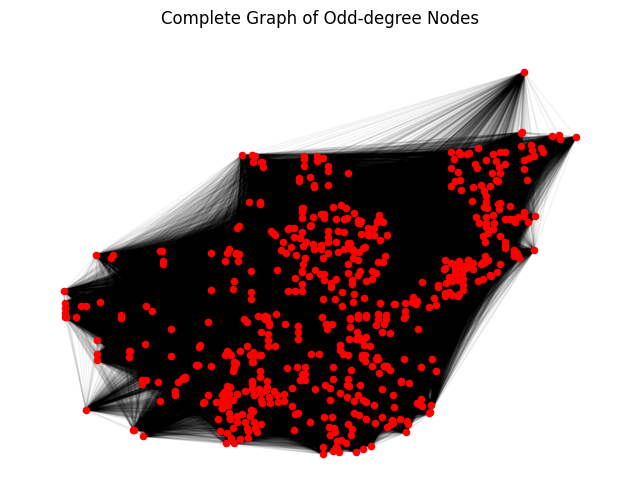

In [14]:
# Plot the complete graph of odd-degree nodes
plt.figure(figsize=(8, 6))
pos_random = nx.random_layout(g_odd_complete)
nx.draw_networkx_nodes(g_odd_complete, node_positions, node_size=20, node_color="red")
nx.draw_networkx_edges(g_odd_complete, node_positions, alpha=0.05)
plt.axis('off')
plt.title('Complete Graph of Odd-degree Nodes')
plt.show()


##### 2.4: Compute Minimum Weight Matching

Extremely complicated algorithm, but luckily implemented in NetworkX package. Maximize the weights (which based on previous manipulations is minimizing distance) in a [matching](https://en.wikipedia.org/wiki/Matching_(graph_theory)).

Runs in $O(n^3)$ time

In [15]:
# Compute min weight matching.
# Note: max_weight_matching uses the 'weight' attribute by default as the attribute to maximize.
odd_matching = nx.algorithms.max_weight_matching(g_odd_complete, True)

print('Number of edges in matching: {}'.format(len(odd_matching)))

print(odd_matching)

Number of edges in matching: 302
{(53570130, 53467594), (53453805, 53623855), (53551205, 53551211), (53478861, 2559389356), (1426556517, 53553535), (1912764495, 1912764498), (2525849885, 3289278035), (53554494, 53554498), (53670638, 53689015), (53467671, 53467672), (448426307, 448426216), (568227381, 568227383), (53480711, 496663082), (53499469, 53577291), (53453833, 53727948), (53521903, 316555212), (491800244, 53712609), (53461211, 53476230), (53646208, 53678702), (568227366, 568248387), (441984856, 244882688), (53536196, 53536198), (53588593, 53588594), (53478865, 53478868), (53542817, 53615345), (53399541, 4217395335), (454667326, 471251970), (53453795, 53453792), (53539766, 53539767), (53385468, 568251597), (2535492577, 3401071589), (568256854, 53521586), (568227374, 2527181543), (6707820040, 4966004326), (2341419151, 2771715837), (53581835, 53581816), (53423905, 53696974), (2525266298, 4191014380), (53516345, 53557774), (244454381, 244454386), (53533412, 53619806), (2525868948, 2

Plot the mininum weight matching on the complete graph

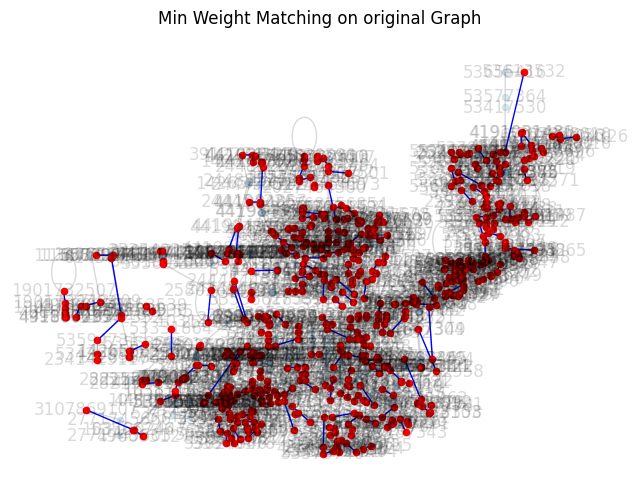

In [16]:
plt.figure(figsize=(8, 6))

# Plot the complete graph of odd-degree nodes
nx.draw_networkx(G, pos=node_positions, node_size=20, alpha=0.15, with_labels=True)

# Create a new graph to overlay on g_odd_complete with just the edges from the min weight matching
g_odd_complete_min_edges = nx.Graph(odd_matching)
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, edge_color='blue', node_color='red')

plt.title('Min Weight Matching on original Graph')
plt.show()


##### 2.5 Augment the original graph

Add the edges to the original graph to make each vertice even degree, making it possible to find an Eulerian tour.

NEED TO CHANGE THIS: distance attributes don't line up with weights of graph

In [17]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    """
    Add the min weight matching edges to the original graph
    Parameters:
        graph: NetworkX graph (original graph from trailmap)
        min_weight_pairs: list[tuples] of node pairs from min weight matching
    Returns:
        augmented NetworkX graph
    """
    
    # We need to make the augmented graph a MultiGraph so we can add parallel edges
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0], 
                           pair[1], 
                           **{'length': nx.dijkstra_path_length(graph, pair[0], pair[1]), 'original': False}
                          )
    return graph_aug

G_aug = add_augmenting_path_to_graph(G, odd_matching)
print(G_aug) # added two extra edges
print(G)

MultiGraph with 813 nodes and 1453 edges
MultiGraph with 813 nodes and 1151 edges


#### Step 3: Compute Eulerian Circuit

In [18]:
def create_eulerian_circuit(graph_augmented, graph_original, start_node=None):
    """
    networkx.eulerian_circuit only returns the order in which we hit each node.  It does not return the attributes of the
    edges needed to complete the circuit.  This is necessary for the postman problem where we need to keep track of which
    edges have been covered already when multiple edges exist between two nodes.
    We also need to annotate the edges added to make the eulerian to follow the actual shortest path trails (not
    the direct shortest path pairings between the odd nodes for which there might not be a direct trail)

    Args:
        graph_augmented (networkx graph): graph w links between odd degree nodes created from `add_augmenting_path_to_graph`.
        graph_original (networkx graph): orginal graph created from `create_networkx_graph_from_edgelist`
        start_node (str): name of starting (and ending) node for CPP solution.

    Returns:
        networkx graph (`graph_original`) augmented with edges directly between the odd nodes
    """

    euler_circuit = list(nx.eulerian_circuit(graph_augmented, source=start_node, keys=True))
    assert len(graph_augmented.edges()) == len(euler_circuit), 'graph and euler_circuit do not have equal number of edges.'

    for edge in euler_circuit:
        aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='length')
        edge_attr = graph_augmented[edge[0]][edge[1]][edge[2]] # node 1, node 2, key. Specify which edge we are getting
        if not edge_attr.get('augmented'):
            yield edge + (edge_attr,)
        else:
            for edge_aug in list(zip(aug_path[:-1], aug_path[1:])): # essentially splitting it into edges: 0,1 then 1,2 then 2,3 (like steps in a path)
                # find edge with shortest distance (if there are two parallel edges between the same nodes)
                edge_aug_dict = graph_original[edge_aug[0]][edge_aug[1]]
                edge_key = min(edge_aug_dict.keys(), key=(lambda k: edge_aug_dict[k]['length']))  # index with min distance
                edge_aug_shortest = edge_aug_dict[edge_key]
                edge_aug_shortest['augmented'] = True
                edge_aug_shortest['id'] = edge_aug_dict[edge_key]['id']
                yield edge_aug + (edge_key, edge_aug_shortest, )

In [19]:
circuit = list(create_eulerian_circuit(G_aug, G))

distance = 0
for edge in circuit:
    distance += edge[3]['length']
print(distance, "meters, or", distance/1000, "km")

168465.54400000005 meters, or 168.46554400000005 km


#### Plot Route

In [20]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt


def plot_path(lat, long, origin_point, destination_point):
    """
    Plot a path on a map
    :param lat: list of latitudes
    :param long: list of longitudes
    :param origin_point: co-ordinates of origin
    :param destination_point: co-ordinates of destination
    """
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name="Path",
        mode="lines",
        lon=long,
        lat=lat,
        marker={'size': 10},
        line=dict(width=4.5, color='blue')))

    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="open-street-map",
                      mapbox_center_lat=30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0},
                      mapbox={
                          'center': {'lat': lat_center,
                                     'lon': long_center},
                          'zoom': 13})
    fig.show()

In [21]:
def euler_circuit_to_route(euler_circuit):
    """
    :param euler_circuit: Eulerian circuit
    :return: List of nodes
    """
    route = []
    for edge in euler_circuit:
        route.append(edge[0])
    return route

def route_to_long_lat(G, route):
    """
    :param G: the graph
    :param route: list of nodes
    :return: list of longitude and latitude of those nodes
    """
    long = []
    lat = []
    for i in route:
        point = G.nodes[i]
        long.append(point['x'])
        lat.append(point['y'])
    return long, lat
def long_lat_to_points(long, lat):
    """
    :param long: list of longitude
    :param lat: list of latitude
    :return: the starting and ending point for plotting the graph
    """
    origin_point = long[0], lat[0]
    dest_point = long[-1], lat[-1]
    return origin_point, dest_point


In [22]:
route = euler_circuit_to_route(circuit)
long, lat = route_to_long_lat(G, route)
origin_point, dest_point = long_lat_to_points(long, lat)
print("Plotting the route")
# Plot the route
plot_path(lat, long, origin_point, dest_point)


Plotting the route


: 